PUnto #1:

In [6]:
def myint(binario):
    # Verifico que la cadena binaria comienza con '0b'
    if not binario.startswith('0b'):
        binario = '0b' + binario

    # Asegurar que tenga 16 bits (rellenare con ceros a la izquierda si es necesario)
    bits = binario[2:]  # Eliminar '0b'
    if len(bits) < 16:
        bits = bits.zfill(16)
    elif len(bits) > 16:
        raise ValueError("El número binario excede los 16 bits")

    valor = 0
    for i, bit in enumerate(bits):
        # El bit más significativo está a la izquierda
        potencia = 15 - i
        valor += int(bit) * (2 ** potencia)

    return valor

# ejemplo dado
numero_binario = '0b1000011100001'
resultado_myint = myint(numero_binario)
resultado_int = int(numero_binario, 2)

print(f"myint({numero_binario}) = {resultado_myint}")
print(f"int({numero_binario}, 2) = {resultado_int}")
print(f"¿Los resultados son iguales? {resultado_myint == resultado_int}")

myint(0b1000011100001) = 4321
int(0b1000011100001, 2) = 4321
¿Los resultados son iguales? True


PUnto 2:

In [11]:
import struct

def number64(binario):
    # Verifico que la cadena tenga 64 bits
    if len(binario) != 64:
        raise ValueError("La cadena binaria debe tener exactamente 64 bits")

    entero = int(binario, 2)

    # Convertir el entero a bytes (8 bytes para double)
    bytes_data = entero.to_bytes(8, byteorder='big', signed=False)

    # Uso structut para interpretar los bytes como double
    valor = struct.unpack('>d', bytes_data)[0]

    return valor

# EJemplo dado
binario = "0100000000111011100100001111111111111111111111111111111111111111"

resultado = number64(binario)
print(resultado)  # Debería imprimir 27.56640625

27.566406249999996


Punto 3:

In [23]:
import math

def aproximar_pi_basico(tolerancia):
#Usando tan pi/4 =1
    suma = 0
    n = 0
    pi_real = math.pi  # Pre-calculamos fuera del bucle
    error = float('inf')

    while error > tolerancia:
        n += 1
        termino = (-1)**(n+1) * (1)**(2*n-1) / (2*n-1)
        suma += termino
        aproximacion = 4 * suma
        error = abs(termino)

    return 4*suma, n

# Ejemplo
tolerancia = 1e-3
pi_aprox, terminos = aproximar_pi_basico(tolerancia)
print(f"Aproximación básica de π con error < {tolerancia}:")
print(f"Valor aproximado: {pi_aprox}")
print(f"Términos necesarios: {terminos}")
print(f"Error real: {abs(pi_aprox - math.pi)}\n")

################################################################
def aproximar_pi_mejorado(tolerancia):
#Usando pi/4 = arctan(1/2) + arctan(1/3)
    suma1 = 0
    suma2 = 0
    n1 = 0
    n2 = 0
    pi_real = math.pi
    error = float('inf')

    while error > tolerancia:
        n1 += 1
        termino1 = (-1)**(n1+1) * (1/2)**(2*n1-1) / (2*n1-1)
        suma1 += termino1

        n2 += 1
        termino2 = (-1)**(n2+1) * (1/3)**(2*n2-1) / (2*n2-1)
        suma2 += termino2

        aproximacion = 4 * (suma1 + suma2)
        error = max(abs(termino1), abs(termino2))

    return 4 * (suma1 + suma2), n1, n2
# Ejemplo
tolerancia = 1e-3
pi_aprox, terminos1, terminos2 = aproximar_pi_mejorado(tolerancia)
print(f"Aproximación mejorada de π con error < {tolerancia}:")
print(f"Valor aproximado: {pi_aprox}")
print(f"Términos en arctan(1/2): {terminos1}")
print(f"Términos en arctan(1/3): {terminos2}")
print(f"Error real: {abs(pi_aprox - math.pi)}\n")

################################################################

def aproximar_pi_machin(tolerancia):
#usando π/4= (4*arctan(1/5) - arctan(1/239))
    suma1 = 0
    suma2 = 0
    n1 = 0
    n2 = 0
    error = float('inf')

    while error > tolerancia:

        n1 += 1
        termino1 = (-1)**(n1+1) * (1/5)**(2*n1-1) / (2*n1-1)
        suma1 += termino1

        if n2 == 0 or (n2 < 5 and n1 % 5 == 0) or error < tolerancia/10:
            n2 += 1
            termino2 = (-1)**(n2+1) * (1/239)**(2*n2-1) / (2*n2-1)
            suma2 += termino2

        aproximacion = 4 * (4*suma1 - suma2)
        error = abs(aproximacion - math.pi)

    return aproximacion, n1, n2

# Ejemplo
tolerancia = 1e-6
pi_aprox, terminos1, terminos2 = aproximar_pi_machin(tolerancia)
print(f"Aproximación Machin de π con error < {tolerancia}:")
print(f"Valor aproximado: {pi_aprox}")
print(f"Términos en arctan(1/5): {terminos1}")
print(f"Términos en arctan(1/239): {terminos2}")
print(f"Error real: {abs(pi_aprox - math.pi)}")

Aproximación básica de π con error < 0.001:
Valor aproximado: 3.143588659585789
Términos necesarios: 501
Error real: 0.0019960059959958087

Aproximación mejorada de π con error < 0.001:
Valor aproximado: 3.1417411974336886
Términos en arctan(1/2): 5
Términos en arctan(1/3): 5
Error real: 0.00014854384389551

Aproximación Machin de π con error < 1e-06:
Valor aproximado: 3.141591674516836
Términos en arctan(1/5): 4
Términos en arctan(1/239): 1
Error real: 9.79072956930338e-07


Punto 4:

Para x=0.5:
  Aproximación: 0.6065306648375496
  Valor exacto: 0.6065306597126334
  Error absoluto: 5.124916158116832e-09
  Términos usados (N): 9

Para x=10.0:
  Aproximación: 4.539992817288513e-05
  Valor exacto: 4.5399929762484854e-05
  Error relativo: 3.501326390242681e-08
  Términos usados (N): 46

Términos para x=10.0 alrededor de n≈9.0:
n=5: término=-833.3333333333335, suma acumulada=-542.3333333333335
n=6: término=1388.8888888888891, suma acumulada=846.5555555555557
n=7: término=-1984.1269841269846, suma acumulada=-1137.571428571429
n=8: término=2480.1587301587306, suma acumulada=1342.5873015873017
n=9: término=-2755.7319223985896, suma acumulada=-1413.144620811288
n=10: término=2755.7319223985896, suma acumulada=1342.5873015873017
n=11: término=-2505.2108385441725, suma acumulada=-1162.6235369568708
n=12: término=2087.6756987868107, suma acumulada=925.0521618299399
n=13: término=-1605.9043836821622, suma acumulada=-680.8522218522223

Para x=20.0:
  Método mejorado: 2.061153622

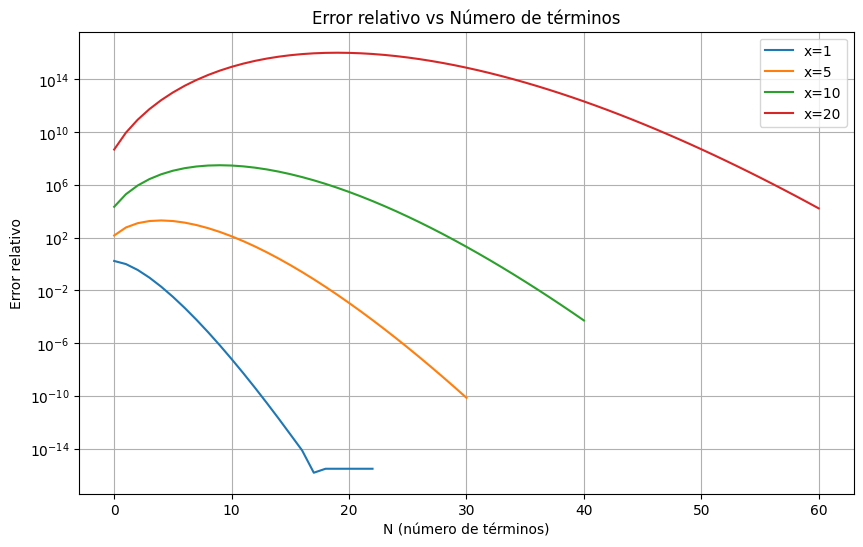

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def serieexponencial(x, tolerance=1e-7):
    term = 1.0
    total = term
    n = 0

    while True:
        n += 1
        term *= -x / n
        if abs(term) <= tolerance * abs(total):
            break
        total += term

    return total, n

x = 0.5
aproximacion1, N = serieexponencial(x)
exacto1 = np.exp(-x)
error1 = abs(aproximacion1 - exacto1)

print(f"Para x={x}:")
print(f"  Aproximación: {aproximacion1}")
print(f"  Valor exacto: {exacto1}")
print(f"  Error absoluto: {error1}")
print(f"  Términos usados (N): {N}")


x = 10.0
aproximacion2, N = serieexponencial(x, tolerance=1e-7)
exacto2 = np.exp(-x)
error2 = abs(aproximacion2 - exacto2)

print(f"\nPara x={x}:")
print(f"  Aproximación: {aproximacion2}")
print(f"  Valor exacto: {exacto2}")
print(f"  Error relativo: {error2/exacto2}")
print(f"  Términos usados (N): {N}")

# Examinar términos alrededor de n ≈ x-1
def show_terms(x):
    term = 1.0
    total = term
    print(f"\nTérminos para x={x} alrededor de n≈{x-1}:")
    for n in range(1, 2*int(x)+1):
        term *= -x / n
        total += term
        if abs(n - (x-1)) < 5:
            print(f"n={n}: término={term}, suma acumulada={total}")

show_terms(x)


#####################

def mejoraealamenosx(x):
    if x > 1:
        return 1 / np.exp(x)
    else:
        return serieexponencial(x)[0]

x_large = 20.0
aproximacionmejorada = mejoraealamenosx(x_large)
exacto3 = np.exp(-x_large)
errormejorado = abs(aproximacionmejorada- exacto3)

print(f"\nPara x={x_large}:")
print(f"  Método mejorado: {aproximacionmejorada}")
print(f"  Valor exacto: {exacto3}")
print(f"  Error relativo: {errormejorado/exacto3}")

#############################
def precisionmayor(x_values):
    results = []
    for x in x_values:
        approx, N = serieexponencial(x)
        exact = np.exp(-x)
        error = abs(approx - exact)/exact if exact != 0 else float('inf')
        results.append((x, N, error))
    return results

# Rango de valores de x
valoresxpequeños = np.linspace(1, 10, 10)
valoresxgrandes = np.linspace(10, 100, 10)

resultados1 = precisionmayor(valoresxpequeños)
resultados2 = precisionmayor(valoresxgrandes)

print("\nResultados para x de 1 a 10:")
for x, N, error in resultados1:
    print(f"x={x:.1f}, N={N}, error relativo={error:.2e}")

print("\nResultados para x de 10 a 100:")
for x, N, error in resultados2:
    print(f"x={x:.1f}, N={N}, error relativo={error:.2e}")


###########################

def figuraerrores(x_values):
    plt.figure(figsize=(10, 6))
    for x in x_values:
        errors = []
        N_values = []
        term = 1.0
        total = term
        exact = np.exp(-x)
        n = 0

        while n <= 2*x + 20:  # Un poco más allá del punto de convergencia
            error = abs(total - exact)/exact if exact != 0 else float('inf')
            errors.append(error)
            N_values.append(n)

            n += 1
            term *= -x / n
            total += term

        plt.plot(N_values, errors, label=f'x={x}')

    plt.yscale('log')
    plt.xlabel('N (número de términos)')
    plt.ylabel('Error relativo')
    plt.title('Error relativo vs Número de términos')
    plt.legend()
    plt.grid(True)
    plt.show()

figuraerrores([1, 5, 10, 20])

PUnto 5:

Comparación de derivadas numéricas y exactas:
Valor exacto en x=1: f'(1) = 1

δ = 1.0e-02: Aproximación = 1.010000000000001, Error = 1.00e-02
δ = 1.0e-04: Aproximación = 1.000099999999890, Error = 1.00e-04
δ = 1.0e-06: Aproximación = 1.000000999917733, Error = 1.00e-06
δ = 1.0e-08: Aproximación = 1.000000003922529, Error = 3.92e-09
δ = 1.0e-10: Aproximación = 1.000000082840371, Error = 8.28e-08
δ = 1.0e-12: Aproximación = 1.000088900583341, Error = 8.89e-05
δ = 1.0e-14: Aproximación = 0.999200722162651, Error = 7.99e-04


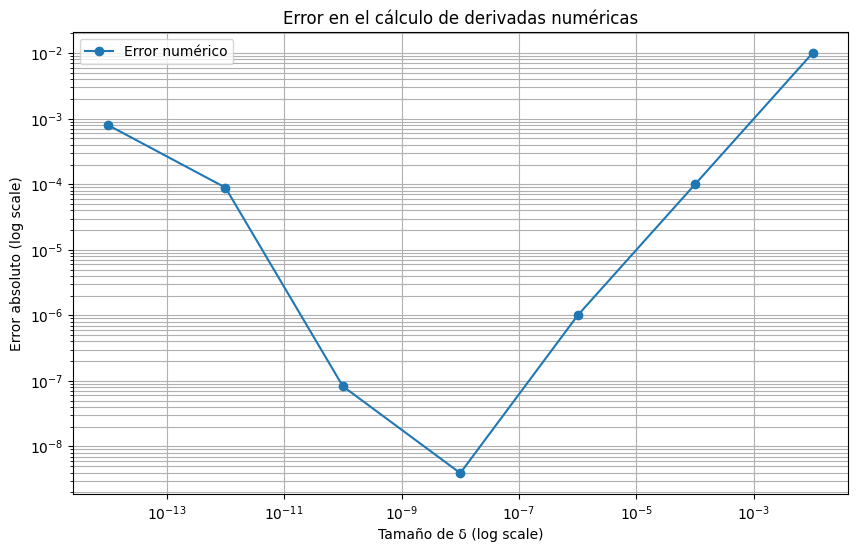

In [28]:
def f(x):
    return x * (x - 1)

def derivada(f, x, delta):
    return (f(x + delta) - f(x)) / delta

# Valor exacto de la derivada en x=1 (calculada analíticamente)
def derivadaexacta(x):
    return 2 * x - 1

puntoenx = 1
valorexacto = derivadaexacta(puntoenx)

# Diferentes valores de delta para probar
deltas = [10**(-n) for n in range(2, 15, 2)]
resultados = []

print("Comparación de derivadas numéricas y exactas:")
print(f"Valor exacto en x={puntoenx}: f'({puntoenx}) = {valorexacto}\n")

for delta in deltas:
    aproximacion = derivada(f, puntoenx, delta)
    error = abs(aproximacion - valorexacto)
    resultados.append((delta, aproximacion, error))
    print(f"δ = {delta:.1e}: Aproximación = {aproximacion:.15f}, Error = {error:.2e}")

# Gráfico del error vs delta
deltas_plot = [r[0] for r in resultados]
errors_plot = [r[2] for r in resultados]

plt.figure(figsize=(10, 6))
plt.loglog(deltas_plot, errors_plot, 'o-', label='Error numérico')
plt.xlabel('Tamaño de δ (log scale)')
plt.ylabel('Error absoluto (log scale)')
plt.title('Error en el cálculo de derivadas numéricas')
plt.grid(True, which="both", ls="-")
plt.legend()
plt.show()


#yo pienso que la computadora tiene limites de precision no puede manejar numeros tan pequeños pequeños